In [89]:
# Explore and implement diverse data transformation techniques

# (Z-score, Min-Max, Mean normalization, Max Absolute, Robust scaling) in Python,

# understanding their impact on data distribution for effective preprocessing.

In [90]:
import pandas as pd
import numpy as np


In [91]:
df = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

In [92]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [93]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [94]:
def mean(array):

  sum = 0
  n = len(array)
  for i in array:
    sum += i
    if (i == 0.0):
      n -= 1

  mean = sum / len(array)

  return mean

def mode(data):
    counts = {}
    for value in data:
      counts[value] +=  1
    max_count = 0
    mode_value = None
    
    for value, count in counts.items():
        if count > max_count:
            max_count = count
            mode_value = value
    return mode_value

def standard_deviation(array):
    n = len(array)
    if n == 0:
        return 0

    m = mean(array)
    variance = sum([(x - m) ** 2 for x in array]) / n
    return variance**0.5


def median(array):

  array = np.sort(array)
  n = len(array)
  if n % 2 == 0 :
    return (array[n//2 -1] + array[n//2]) / 2

  else:
    return array[n//2]


def quartile_calculation(array):

  n = len(array)
  max_elem = max(array)
  min_elem = min(array)
  np.sort(array)

  Q1 = np.percentile(array, 25)
  Q2 = np.percentile(array, 50)
  Q3 = np.percentile(array, 75)

  IQR = Q3 - Q1

  return Q1, Q2, Q3, IQR


In [95]:
df.nunique() # look to see which columns have lot of unique, 
# we perform normalization on ApplicantIncome, CoapplicantIncome, LoanAmount

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [96]:
(df.isnull().sum()/(len(df)))*100 # convert to %age

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [97]:
# removing Loan_ID since no analysis can be done
df = df.drop(['Loan_ID'], axis = 1)

In [98]:
cat_cols=cat_cols = df.columns[df.dtypes == 'object']

num_cols = num_cols = df.columns[df.dtypes != 'object'].tolist()


print(f"Categorical Variables: {cat_cols}")

print(f"Numerical Variables: {num_cols}")

Categorical Variables: Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')
Numerical Variables: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [99]:
for col in num_cols:
    m = df[col].mean()
    df[col].fillna(m, inplace = True, axis = 0)

In [100]:
df[num_cols].isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [110]:
def z_score_normal(array):
    
    u = mean(array)
    s = standard_deviation(array)
    
    z_score_array = (array - u)/s
    
    return z_score_array

def min_max_normalization(array):
    min_val = min(array)
    max_val = max(array)
    
    normalized_array = (array - min_val) / (max_val - min_val)
    
    return normalized_array

def max_absolute_normalization(array):
    
    max_abs_val = max(abs(array))
    
    normalized_array = array / max_abs_val
    
    return normalized_array

def robust_scaling(array):
    
    Q1, _, Q3, IQR = quartile_calculation(array)
    
    scaled_array = (array - Q1) / IQR
    
    return scaled_array

def mean_normalization(array):
    m = mean(array)
    sd = standard_deviation(array)
    normalized_array = (array - m) / sd
    
    return normalized_array
    

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

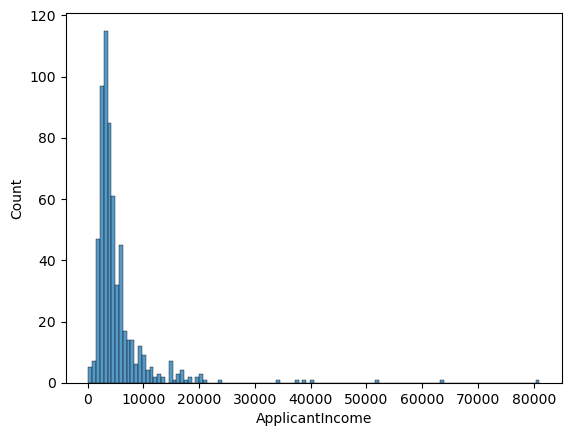

In [107]:
applicant_income_mean = mean(df["ApplicantIncome"])
applicant_income_std = standard_deviation(df["ApplicantIncome"])
sns.histplot(df["ApplicantIncome"])


<Axes: xlabel='ApplicantIncome', ylabel='Count'>

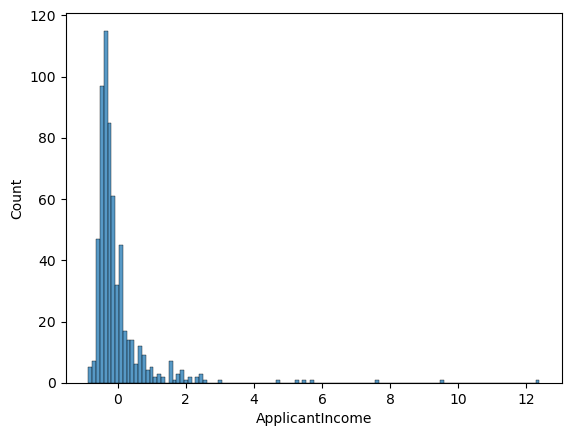

In [108]:
df["ApplicantIncome"] = z_score_normal(df["ApplicantIncome"])
normal_applicant_income_mean = mean(df["ApplicantIncome"])
normal_applicant_income_std = standard_deviation(df["ApplicantIncome"])
sns.histplot(df["ApplicantIncome"])

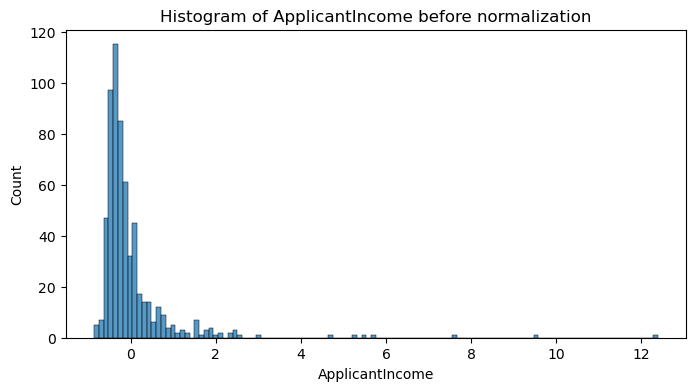

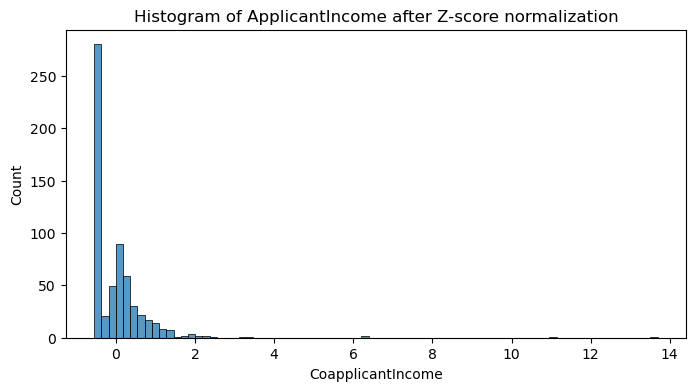

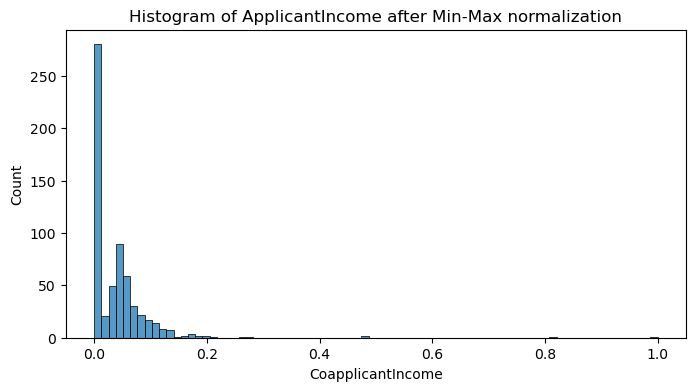

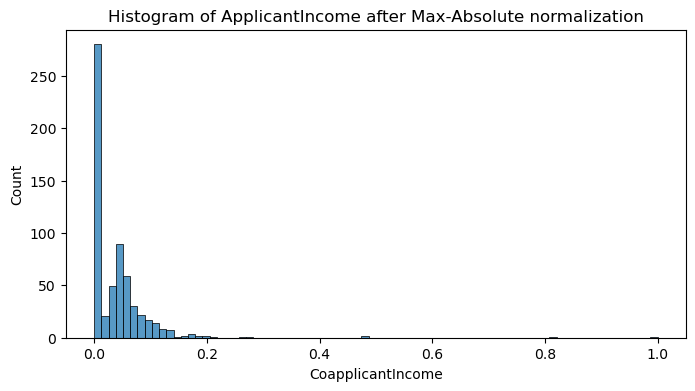

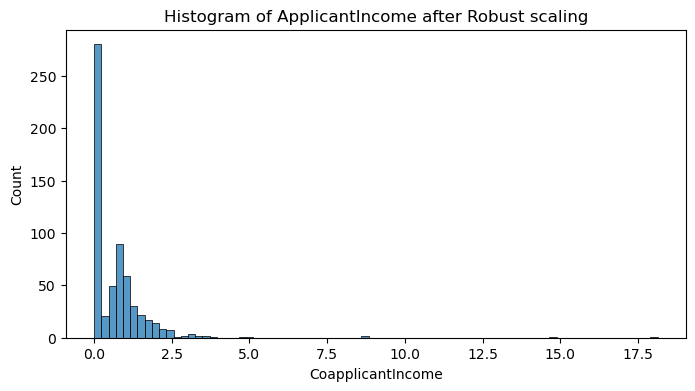

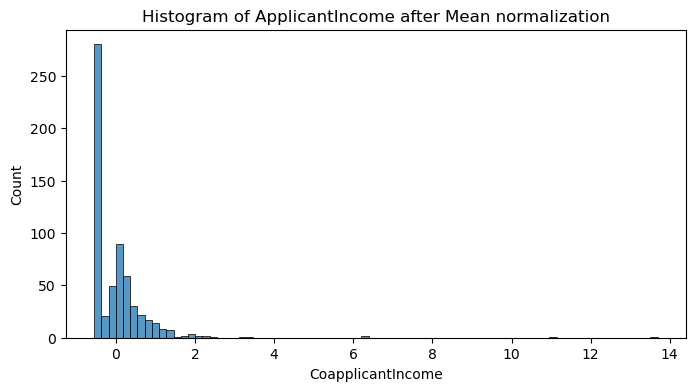

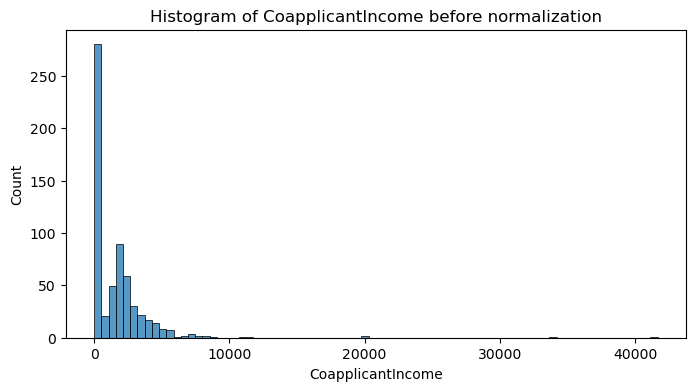

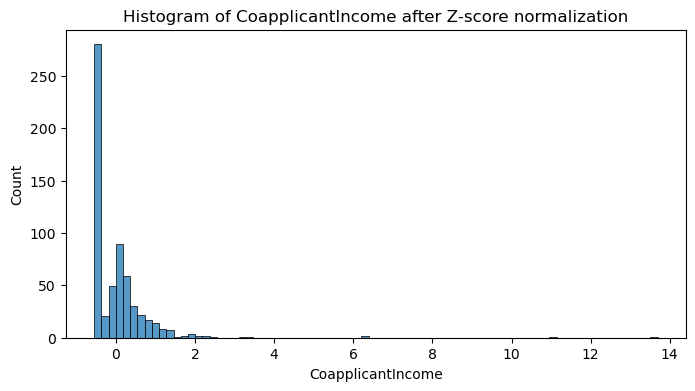

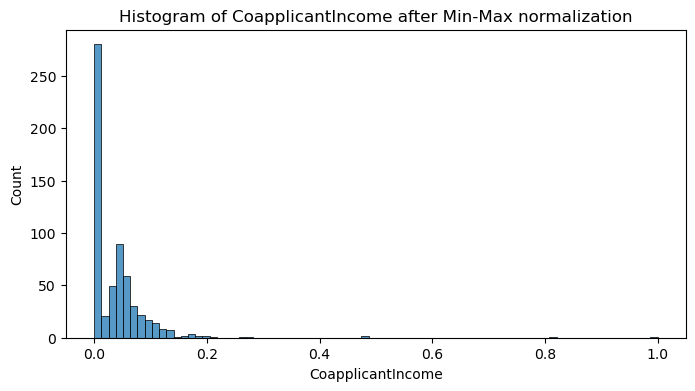

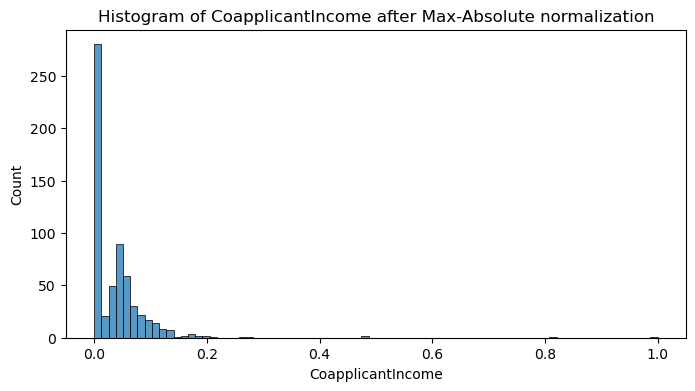

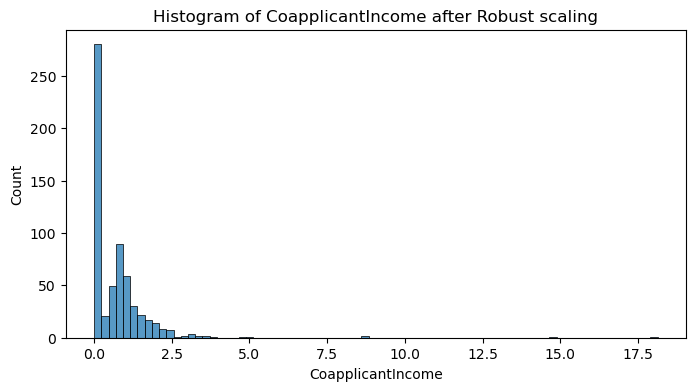

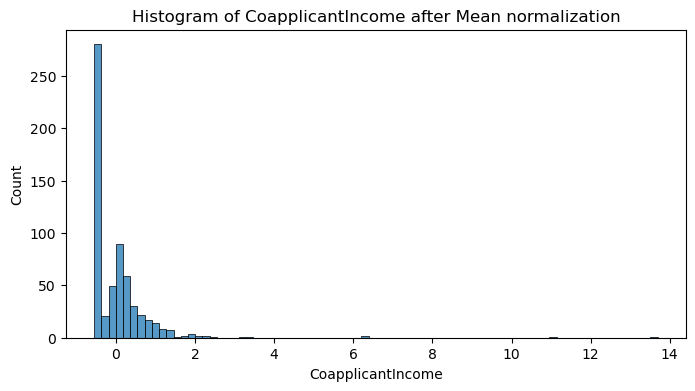

In [114]:
columns_to_normalize = ['ApplicantIncome', 'CoapplicantIncome']


for column in columns_to_normalize:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column])
    plt.title(f"Histogram of {column} before normalization")
    plt.show()    

    df[f'{column}_z_score'] = z_score_normal(df[column])
    df[f'{column}_min_max'] = min_max_normalization(df[column])
    df[f'{column}_max_abs'] = max_absolute_normalization(df[column])
    df[f'{column}_robust'] = robust_scaling(df[column])
    df[f'{column}_mean_norm'] = mean_normalization(df[column])

    # z score graph
    plt.figure(figsize=(8, 4))
    sns.histplot(z_score_normalized)
    plt.title(f"Histogram of {column} after Z-score normalization")
    plt.show()
    
    #min max graph
    plt.figure(figsize=(8, 4))
    sns.histplot(min_max_normalized)
    plt.title(f"Histogram of {column} after Min-Max normalization")
    plt.show()

    plt.figure(figsize=(8, 4))
    sns.histplot(max_abs_normalized)
    plt.title(f"Histogram of {column} after Max-Absolute normalization")
    plt.show()

    plt.figure(figsize=(8, 4))
    sns.histplot(robust_scaled)
    plt.title(f"Histogram of {column} after Robust scaling")
    plt.show()

    plt.figure(figsize=(8, 4))
    sns.histplot(mean_normalized)
    plt.title(f"Histogram of {column} after Mean normalization")
    plt.show()


In [115]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,ApplicantIncome_z_score,ApplicantIncome_min_max,ApplicantIncome_max_abs,ApplicantIncome_robust,ApplicantIncome_mean_norm,CoapplicantIncome_z_score,CoapplicantIncome_min_max,CoapplicantIncome_max_abs,CoapplicantIncome_robust,CoapplicantIncome_mean_norm
0,Male,No,0,Graduate,No,0.072991,0.0,146.412162,360.0,1.0,...,0.072991,0.070489,0.005894,1.018509,0.072991,-0.554487,0.000000,0.000000,0.000000,-0.554487
1,Male,Yes,1,Graduate,No,-0.134412,1508.0,128.000000,360.0,1.0,...,-0.134412,0.054830,-0.010853,0.584576,-0.134412,-0.038732,0.036192,0.036192,0.656437,-0.038732
2,Male,Yes,0,Graduate,Yes,-0.393747,0.0,66.000000,360.0,1.0,...,-0.393747,0.035250,-0.031793,0.041988,-0.393747,-0.554487,0.000000,0.000000,0.000000,-0.554487
3,Male,Yes,0,Not Graduate,No,-0.462062,2358.0,120.000000,360.0,1.0,...,-0.462062,0.030093,-0.037309,-0.100943,-0.462062,0.251980,0.056592,0.056592,1.026445,0.251980
4,Male,No,0,Graduate,No,0.097728,0.0,141.000000,360.0,1.0,...,0.097728,0.072356,0.007891,1.070266,0.097728,-0.554487,0.000000,0.000000,0.000000,-0.554487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,-0.410130,0.0,71.000000,360.0,1.0,...,-0.410130,0.034014,-0.033116,0.007712,-0.410130,-0.554487,0.000000,0.000000,0.000000,-0.554487
610,Male,Yes,3+,Graduate,No,-0.212557,0.0,40.000000,180.0,1.0,...,-0.212557,0.048930,-0.017163,0.421080,-0.212557,-0.554487,0.000000,0.000000,0.000000,-0.554487
611,Male,Yes,1,Graduate,No,0.437174,240.0,253.000000,360.0,1.0,...,0.437174,0.097984,0.035300,1.780463,0.437174,-0.472404,0.005760,0.005760,0.104473,-0.472404
612,Male,Yes,2,Graduate,No,0.357064,0.0,187.000000,360.0,1.0,...,0.357064,0.091936,0.028831,1.612853,0.357064,-0.554487,0.000000,0.000000,0.000000,-0.554487
